In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
import os
import matplotlib.pyplot as plt
import numpy as np


transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])


train_dir = 'D:\\Lab\\DL\\ex7\\Vegetable Images\\train'
test_dir = 'D:\\Lab\\DL\\ex7\\Vegetable Images\\test'
val_dir = 'D:\\Lab\\DL\\ex7\\Vegetable Images\\validation'


train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

# Define dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


In [2]:

model = models.resnet18(pretrained=True)


for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100.0 * correct / total
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

val_accuracy = 100.0 * correct / total
print(f"Validation Accuracy: {val_accuracy:.2f}%")


Epoch [1/10], Train Loss: 0.4038, Train Accuracy: 92.47%
Epoch [2/10], Train Loss: 0.0741, Train Accuracy: 98.85%
Epoch [3/10], Train Loss: 0.0442, Train Accuracy: 99.35%
Epoch [4/10], Train Loss: 0.0333, Train Accuracy: 99.39%
Epoch [5/10], Train Loss: 0.0250, Train Accuracy: 99.61%
Epoch [6/10], Train Loss: 0.0203, Train Accuracy: 99.69%
Epoch [7/10], Train Loss: 0.0174, Train Accuracy: 99.65%
Epoch [8/10], Train Loss: 0.0162, Train Accuracy: 99.69%
Epoch [9/10], Train Loss: 0.0134, Train Accuracy: 99.74%
Epoch [10/10], Train Loss: 0.0108, Train Accuracy: 99.82%
Validation Accuracy: 99.80%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

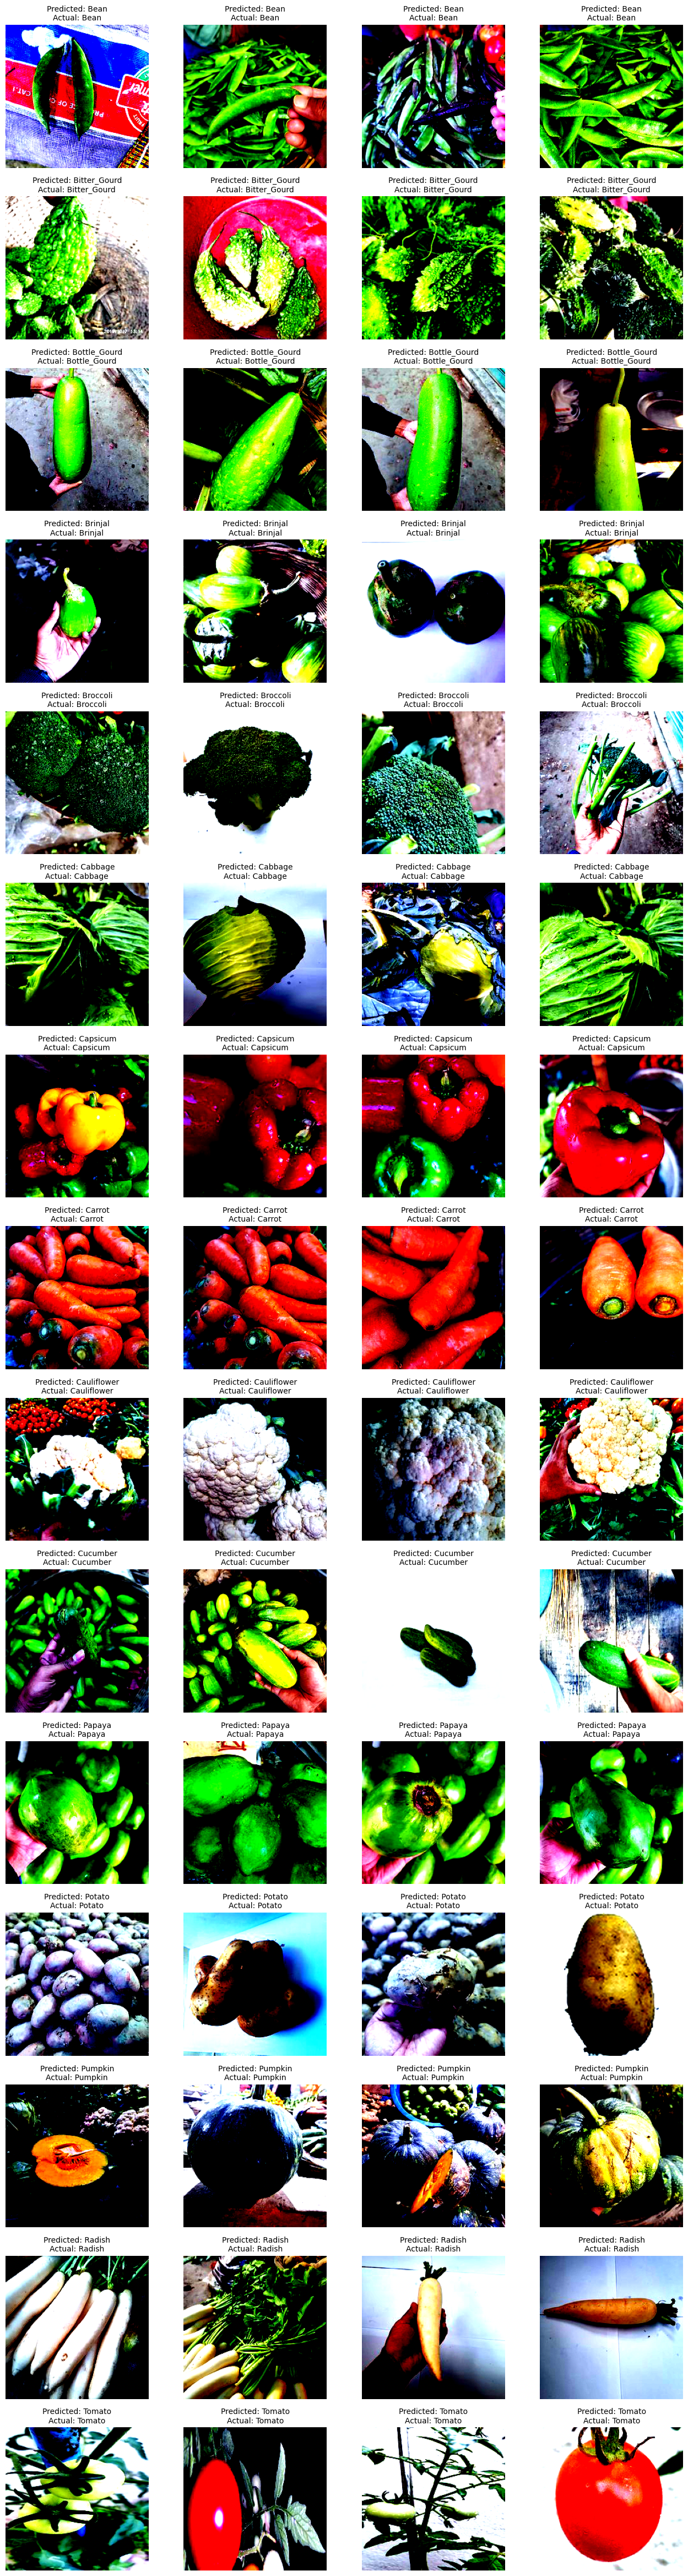

In [4]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def show_classification_images(model, data_loader, dataset_classes, num_images_per_class=2):
    model.eval()
    class_image_count = {class_name: 0 for class_name in dataset_classes}
    total_images = len(dataset_classes) * num_images_per_class
    num_cols = 4
    num_rows = int(math.ceil(total_images / num_cols))

    with torch.no_grad():
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
        for ax in axes.flatten():
            ax.axis('off') 

        current_row = 0
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)  
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for i in range(len(labels)):
                class_name = dataset_classes[labels[i]]
                if class_image_count[class_name] < num_images_per_class:
                    row = class_image_count[class_name] // num_cols
                    col = class_image_count[class_name] % num_cols
                    ax = axes[current_row, col]
                    ax.imshow(np.transpose(images[i].cpu().numpy(), (1, 2, 0)))  
                    ax.set_title(f'Predicted: {dataset_classes[predicted[i]]}\nActual: {class_name}', fontsize=10)
                    class_image_count[class_name] += 1
                    if sum(class_image_count.values()) >= total_images:
                        break
                    if class_image_count[class_name] % num_cols == 0:  
                        current_row += 1  
            if sum(class_image_count.values()) >= total_images:
                break

show_classification_images(model, val_loader, train_dataset.classes, num_images_per_class=4)


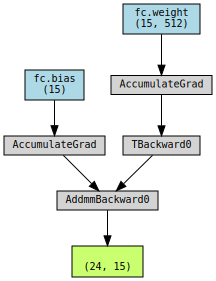

In [7]:
from torchviz import make_dot

make_dot(model(images.to(device)), params=dict(model.named_parameters()))